## Question No. 1: Exploring data

*Start by loading the training and test data.*

In [1]:
import numpy as np

# Load training data
Xtrain = np.loadtxt('Xtrain.csv')

# Load training labels
Ytrain = np.loadtxt('Ytrain.csv')

# Load test data
Xtest = np.loadtxt('Xtest.csv')

### i. Dataset Overview

*a. How many examples are in the training set? And in the test set?*

In [2]:
# Number of examples in the training and test set
num_examples_train = Xtrain.shape[0]
num_examples_test = Xtest.shape[0]

print("Number of examples in the training set:", num_examples_train)
print("Number of examples in the test set:", num_examples_test)

Number of examples in the training set: 3000
Number of examples in the test set: 3000


*b. Within the training data, count the positive and negative examples. What's the distribution like? Does this distribution signify any potential issues in terms of design of the machine learning solution and its evaluation?*

In [3]:
# Count positive examples
num_positive = np.sum(Ytrain == 1)

# Count negative examples
num_negative = np.sum(Ytrain == -1)

print("Number of positive examples in the training data:", num_positive)
print("Number of negative examples in the training data:", num_negative)

Number of positive examples in the training data: 311
Number of negative examples in the training data: 2689


This is an imbalanced dataset where the negative examples significantly outnumber the positive examples. The class imbalance can potentially lead to challenges in training a machine learning model, here are some considerations:

1. **Model Bias**: The imbalanced class distribution may cause the model to be biased towards the majority (negative) class. High accuracy may be achieved by simply predicting the majority class, but performance on the minority class may be poor.

2. **Evaluation Metrics**: Accuracy may not be a suitable evaluation metric in imbalanced datasets. It's important to look at precision, recall, etc, which take into account both true positives and false positives.

3. **Handling Imbalance**: Consider using techniques to handle class imbalance, such as oversampling the minority class, undersampling the majority class, or using algorithms that assign class weight to handle imbalanced datasets.

4. **Cross-Validation Issues**: When evaluating the model, consider using techniques like stratified cross-validation to ensure that each fold maintains a similar class distribution.

5. **Monitoring Training**: Keep an eye on the model's performance on both classes during training. If the model struggles to learn the minority class, it might be necessary to adjust the training strategy.

### ii. Visual Data Exploration

*a. Pick 10 random objects from each class in the training data and display them using plt.matshow. Reshape the flattened 28x28 arrays for this. What patterns or characteristics do you notice?*

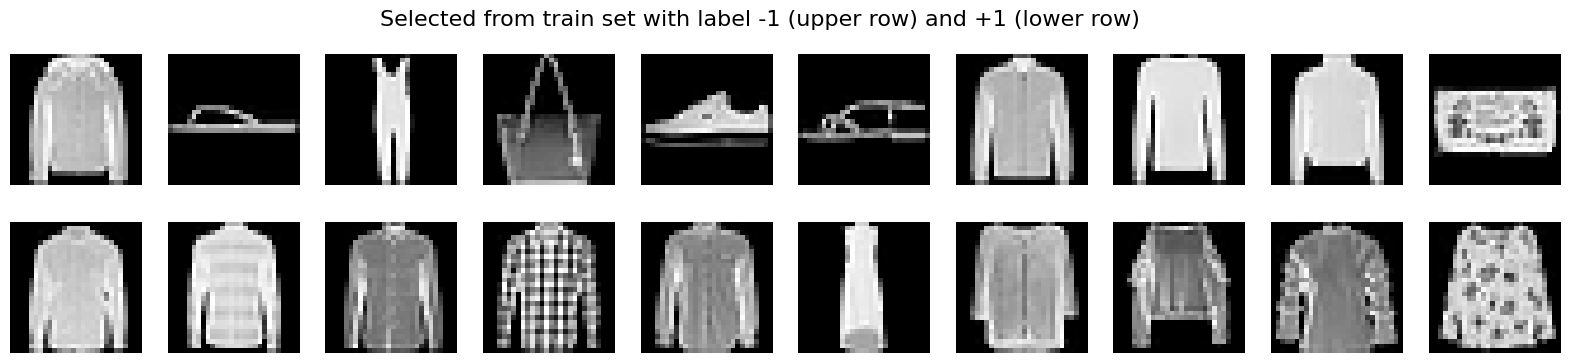

In [7]:
import matplotlib.pyplot as plt

num_classes = 2
class_labels = [-1, 1]

# Create a figure for plotting
fig, axes = plt.subplots(num_classes, 10, figsize=(20, 4))

# Iterate through each class
for i in range(num_classes):
    # Select 10 random objects from each class
    class_indices = np.where(Ytrain == class_labels[i])[0]
    random_indices = np.random.choice(class_indices, size=10, replace=False)
    random_objects = Xtrain[random_indices]

    # Reshape and display the flattened 28x28 arrays
    for j in range(10):
        axes[i, j].matshow(random_objects[j].reshape(28, 28), cmap='gray')
        axes[i, j].axis('off')

# Add a title to the entire figure
plt.suptitle('Selected from train set with label -1 (upper row) and +1 (lower row)', fontsize=16)

plt.show()

Based on the observations of the randomly selected images from the training set, some patterns are noteworthy:

1. **Diversity in Label -1**: The class labeled as -1 appears to encompass a variety of items such as tops, pants, long garments, shoes, and bags. This suggests a diverse range of objects falling under this class.

2. **Consistency in Label 1**: The class labeled as 1 is more consistent, predominantly representing tops or upper garments.

3. **Potential Labeling Inconsistency**: There is a potential concern about the accuracy or criteria of labeling within the -1 class. The presence of various items within this class, including both upper/lower garments and other accessories, raises questions about the consistency and precision of labeling.

4. **Further Analysis**: A more in-depth analysis of the samples labeled as -1 is recommended. Examining the -1 class samples and assessing their distribution within the training set may provide additional insights into potential labeling issues.

*b. Do the same for 10 random objects from the test set. Are there any peculiarities in the data that might challenge your classifier's ability to generalise?*

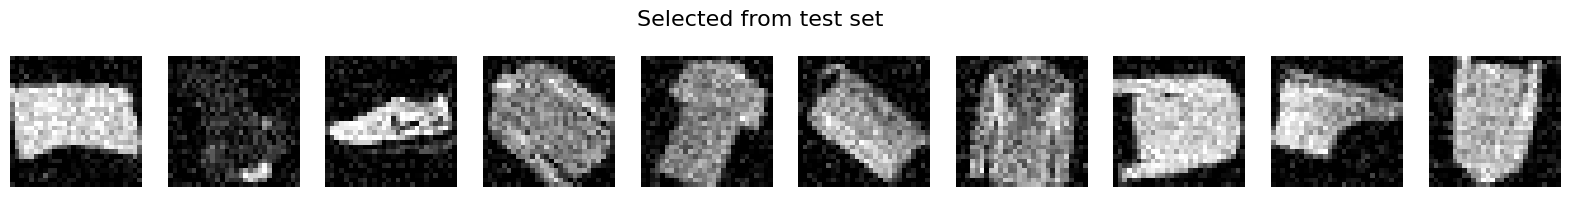

In [5]:
# Create a figure for plotting
fig, axes = plt.subplots(1, 10, figsize=(20, 2.3))

# Select 10 random objects from each class
random_indices_test = np.random.choice(np.arange(len(Xtest)), size=10, replace=False)
random_objects_test = Xtest[random_indices_test]

# Reshape and display the flattened 28x28 arrays
for i in range(10):
    axes[i].matshow(random_objects_test[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')

# Add a title to the entire figure
plt.suptitle('Selected from test set', fontsize=16)

plt.show()

The test set exhibits peculiarities that might pose challenges for the classifier's generalization ability. One noteworthy characteristic is the diversity in orientations and angles of objects in the test set compared to the training set. Unlike the training set, where objects are predominantly upright, the test set introduces instances with objects inverted or tilted.

This diversity in angles introduces a level of complexity for the classifier, as it needs to generalize across various viewpoints. Challenges lie in ensuring that the model can effectively learn and adapt to features regardless of the object's orientation.

### iii. Choosing the Right Metric
*Which performance metric would be best for this task (accuracy, AUC-ROC, AUC-PR, F1, Matthews correlation coefficient, mean squared error etc.)? Share your reasoning for this choice.*

Let's discuss the metrics and their suitability for this task:

1. **Accuracy**: In scenarios where the classes are imbalanced (as indicated by the uneven distribution of positive and negative examples in our training set), accuracy alone may not provide a complete picture.

2. **AUC-ROC**: Similarily, AUC-ROC is not a good metric for datasets with a lot more negative examples than positive ones.

3. **AUC-PR**: AUC-PR is particularly useful when dealing with imbalanced datasets. It focuses on the precision-recall trade-off and provides an informative metric when positive examples are rare.

4. **F1 Score**: F1 score, the harmonic mean of precision and recall, is suitable for imbalanced datasets and provides a balance between false positives and false negatives (precision and recall).

5. **Matthews Correlation Coefficient**: MCC takes into account true positives, true negatives, false positives, and false negatives. It is useful in providing a balanced measure of classification performance for imbalanced datasets.

6. **Mean Squared Error**: MSE is not a recommended metric for binary (discrete labels) classification tasks like object recognition, as it is designed for regression problems where the output is continuous.

In conclusion, AUC-PR, F1 score, and MCC may provide more meaningful insights than accuracy, AUC-ROC or MSE.

### iv. Benchmarking a Random Classifier
*Imagine a classifier that randomly guesses labels. What accuracy would you expect it to achieve on both the training and test datasets? Show this through a calculation, statistical proof, or a coding experiment.*

In [6]:
from sklearn.metrics import accuracy_score

num_samples = Xtrain.shape[0]

# Randomly guess labels
# Take the sign of uniformly distributed values generated between -1 and 1
random_guesses = np.sign(np.random.uniform(-1, 1, size=num_samples))

# Calculate accuracy
accuracy = accuracy_score(Ytrain, random_guesses)
print(f"Accuracy on training dataset: {accuracy}")

Accuracy on training dataset: 0.49433333333333335


The random classifier is constructed by first generating random numbers uniformly distributed in the range from -1 to 1 and then transformed these values into class labels by taking their sign. The expected accuracy of this random (also a binary) classifier, regardless of the class distribution within a dataset, is 0.5 or 50% (there might be some variability due to the small size of the training and test dataset, but the observed accuracy is expected to be around 0.5).

For each single test point, the probability for the random classifier to predict -1 or +1 is both 50%, so the probability of guessing the lable correctly or incorrectly is also 50%. The expected accuracy of the whole training or test dataset can be expressed as *the number of correct predictions / total number of predictions*, thus for N data points we would have *0.5N / N = N*.

### v. Understanding AUC Metrics for Random Classifier
*What would be the AUC-ROC and AUC-PR for a random classifier in this context? Again, support your answer with a mathematical or statistical argument, or a practical demonstration.*

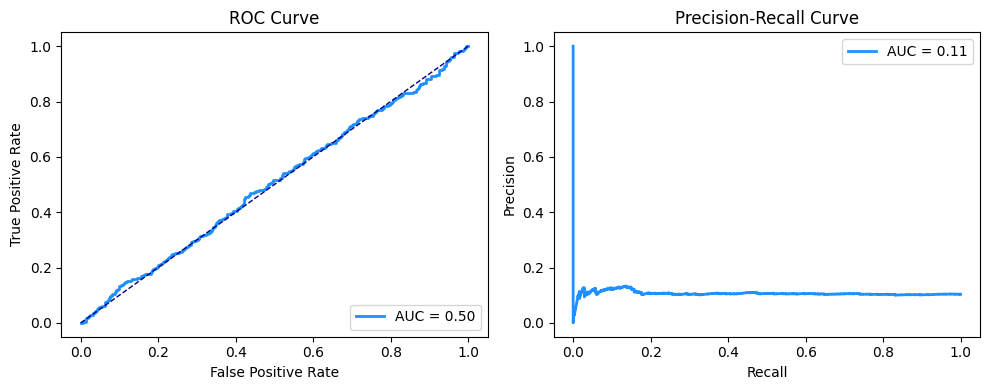

AUC-ROC for random classifier: 0.5044440910270377
AUC-PR for random classifier: 0.10610653564674405


In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

num_samples = Xtrain.shape[0]

# Randomly guess labels
random_guesses = np.random.uniform(-1, 1, size=num_samples)

# ROC curve
fpr, tpr, _ = roc_curve(Ytrain, random_guesses)
roc_auc = auc(fpr, tpr)

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(Ytrain, random_guesses)
pr_auc = auc(recall, precision)

# Plotting
plt.figure(figsize=(10, 4))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='dodgerblue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='dodgerblue', lw=2, label=f'AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

print(f"AUC-ROC for random classifier: {roc_auc}")
print(f"AUC-PR for random classifier: {pr_auc}")

For a random classifier, the Area Under the Receiver Operating Characteristic (AUC-ROC) curve and the Area Under the Precision-Recall (AUC-PR) curve are expected to be close to 0.5. Let's discuss the rationale behind this:

**AUC-ROC**: The ROC curve plots the True Positive Rate against the False Positive Rate. A random classifier would have a diagonal ROC curve, indicating that the True Positive Rate and False Positive Rate are changing at approximately the same speed from 0 to 1. Thus the AUC-ROC for a random classifier, representing the area under the diagonal line, is close to 0.5.

**AUC-PR**: The PR curve plots Precision against Recall. A random classifier would have a PR curve that looks like a vertical line (when the threshold is super small, Percision is 1 and Recall is 0) concatenated with a horizontal line (where precision is constant at the fraction of positives instances in the total data set, not influenced by specific prediction values). For example, the train dataset has 311 positive examples among 3000, so we end up with a AUC-PR value of around *311 / 3000 ≈ 0.1*.